In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore # z score is used to check outliers.


In [4]:
airline = pd.read_csv("air-passenger.csv")

In [5]:
airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [7]:
airline.shape

(144, 2)

In [9]:
airline.columns = ['Date','passengers']

In [10]:
airline.head()

,Date,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
# Convert Date to datetime and set index
airline['Date'] = pd.to_datetime(airline['Date'])
airline.set_index('Date', inplace = True)

In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [13]:
# Checking for missing values
print(airline.isnull().sum())

passengers    0
dtype: int64


No Null Value.

If there were missing values  we can fill that by using fillna(method = 'ffill') forward fill

In [14]:
#Detect Outliers using z-score
airline['z_score'] = zscore(airline['passengers'])

In [15]:
#Remove outliers beyond (positive/negative 3)
airline = airline[airline['z_score'].abs()<3]

In [16]:
airline.head()

,passengers,z_score
Date,,
1949-01-01,112,-1.407779
1949-02-01,118,-1.357590
1949-03-01,132,-1.240483
1949-04-01,129,-1.265578
1949-05-01,121,-1.332496


In [17]:
airline.shape

(144, 2)

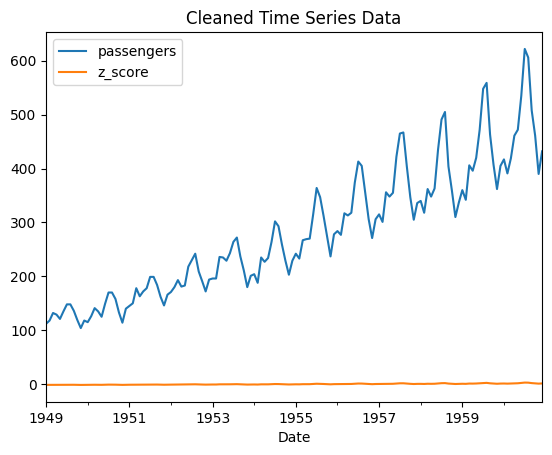

In [18]:
#Plot the cleaned data
airline.plot(title = 'Cleaned Time Series Data')
plt.show()

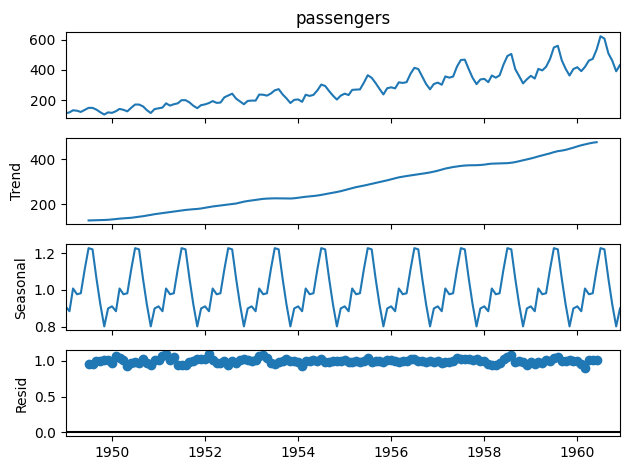

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

#Multiplicative decompose (for seasonal data)
result = seasonal_decompose(airline['passengers'], model='multiplicative', period=12)
# Plot decomposition
result.plot()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


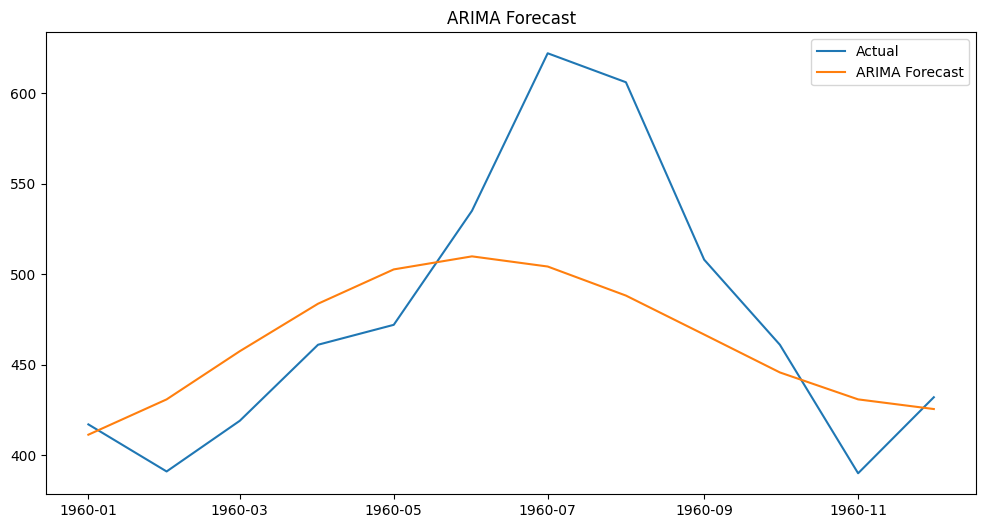

In [27]:
from statsmodels.tsa.arima.model import ARIMA
#train-test split
train = airline.iloc[:-12]
test = airline.iloc[-12:]

#fit ARIMA  model
model_arima = ARIMA(train['passengers'], order=(2, 1, 2))
model_arima_fit = model_arima.fit()

# Forcast next 12 months
forecast_arima = model_arima_fit.forecast(steps=12)

#plot
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['passengers'], label='Actual')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#train-test split
train = airline.iloc[:-12]
test = airline.iloc[-12:]